In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Unemployment in India.csv')
df.head(6)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural


In [6]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape

(740, 7)

In [11]:
df = df.rename(columns=lambda x: x.strip().replace(' ', ''))
df

,Region,Date,Frequency,EstimatedUnemploymentRate(%),EstimatedEmployed,EstimatedLabourParticipationRate(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [14]:
df['Date']=pd.to_datetime(df['Date'])
from datetime import datetime
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Region,Date,Frequency,EstimatedUnemploymentRate(%),EstimatedEmployed,EstimatedLabourParticipationRate(%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,9,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,2,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,3,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,4,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,5,2020


In [17]:
df.drop('Date', inplace=True,axis=1)
df = df.rename(columns={df.columns[0]:'State',df.columns[2]:'EUR',df.columns[3]:'EE', df.columns[4]:'ELPR', df.columns[5]:'Region',df.columns[6]:'Day'})
df.head()

,State,Frequency,EUR,EE,ELPR,Region,Day,Month,Year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,30,9,2019


In [19]:
df["State"].unique()
df['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [20]:
df['Frequency'] = df['Frequency'].replace(' Monthly', 'Monthly')

In [21]:
df['Region'].value_counts()

Urban    381
Rural    359
Name: Region, dtype: int64

In [24]:
Reg = df.groupby('State')

In [23]:
df['Year'].unique()

array([2019, 2020], dtype=int64)

In [25]:
Reg.first().sort_values(by='EUR',ascending=False )

,Frequency,EUR,EE,ELPR,Region,Day,Month,Year
State,,,,,,,,
Tripura,Monthly,29.25,1019549.0,64.47,Rural,31,5,2019
Chandigarh,Monthly,18.35,348042.0,44.89,Urban,31,5,2019
Haryana,Monthly,14.54,5249186.0,45.12,Rural,31,5,2019
Himachal Pradesh,Monthly,13.68,2045760.0,44.23,Rural,31,5,2019
Jammu & Kashmir,Monthly,12.78,2495186.0,40.57,Rural,31,5,2019
Delhi,Monthly,12.56,169487.0,42.33,Rural,31,5,2019
Uttar Pradesh,Monthly,10.26,43287808.0,39.96,Rural,31,5,2019
Chhattisgarh,Monthly,9.82,6259019.0,42.89,Rural,31,5,2019
Bihar,Monthly,9.27,24322330.0,39.75,Rural,31,5,2019


In [ ]:
From Above Data we get:
Uttarpradesh have highest no of employed with respect to 
population 43287808.0 sikkim have lowest unemployed population of 146688.0 
Tripura have highest unemployment rate of 29.25 Puducherry have lowest umemployemnt rate 0.00 % 
Meghalaya highest LabourParticipationRate of 66.13 
Uttarakhand have lowest LabourParticipationRate of 37.47%

In [26]:
df.groupby("State").size()

State
Andhra Pradesh      28
Assam               26
Bihar               28
Chandigarh          12
Chhattisgarh        28
Delhi               28
Goa                 24
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jammu & Kashmir     21
Jharkhand           28
Karnataka           28
Kerala              28
Madhya Pradesh      28
Maharashtra         28
Meghalaya           27
Odisha              28
Puducherry          26
Punjab              28
Rajasthan           28
Sikkim              17
Tamil Nadu          28
Telangana           28
Tripura             28
Uttar Pradesh       28
Uttarakhand         27
West Bengal         28
dtype: int64

In [28]:
region_stats = df.groupby(['State'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats.sort_values(by='EUR', ascending =True)
#UNemployment is low in Meghalaya
#Unemployement is higher in Tripura is highest

,State,EUR,EE,ELPR
16,Meghalaya,4.80,689736.81,57.08
17,Odisha,5.66,6545746.96,38.93
1,Assam,6.43,5354772.15,44.87
26,Uttarakhand,6.58,1390228.11,33.78
7,Gujarat,6.66,11402012.79,46.10
12,Karnataka,6.68,10667119.29,41.35
21,Sikkim,7.25,106880.71,46.07
14,Madhya Pradesh,7.41,11115484.32,38.82
0,Andhra Pradesh,7.48,8154093.18,39.38
15,Maharashtra,7.56,19990195.86,42.30


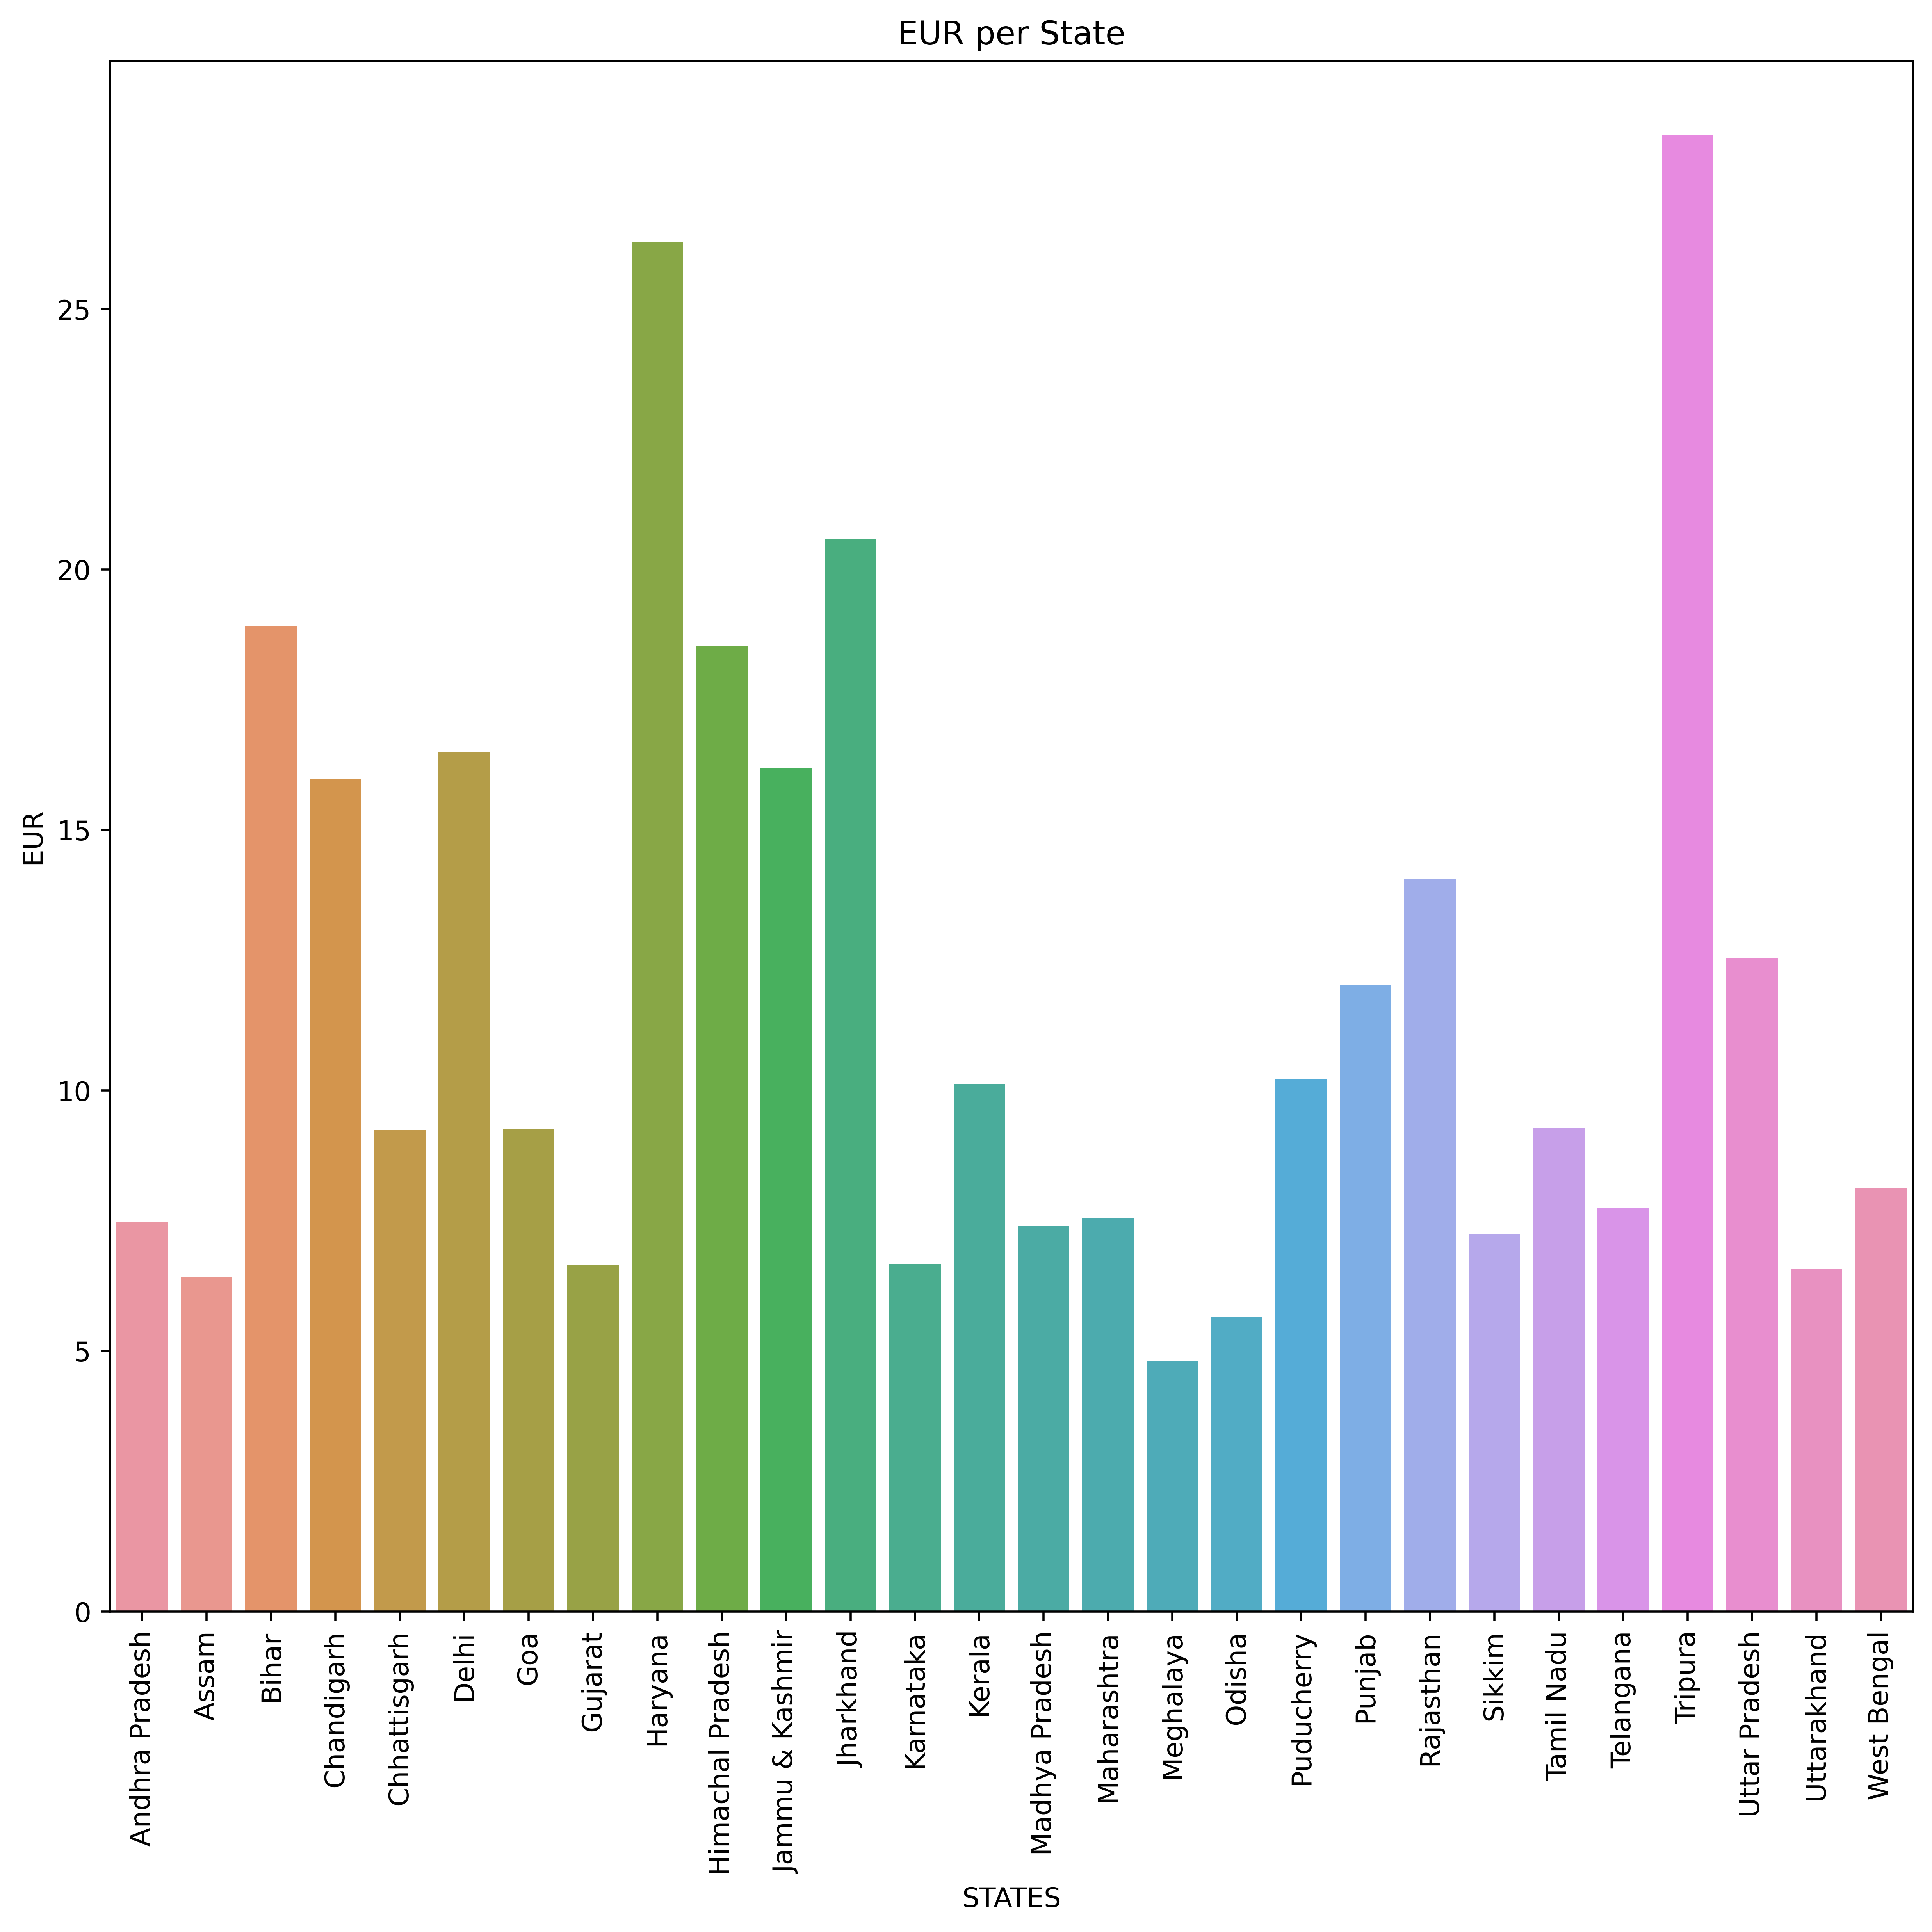

In [36]:
plt.figure(figsize=(10,10),dpi=500)
#plt.subplot(1, 2, 2)
sns.barplot(data=region_stats, x='State', y='EUR')
plt.xlabel('STATES')
plt.ylabel('EUR')
plt.title('EUR per State')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



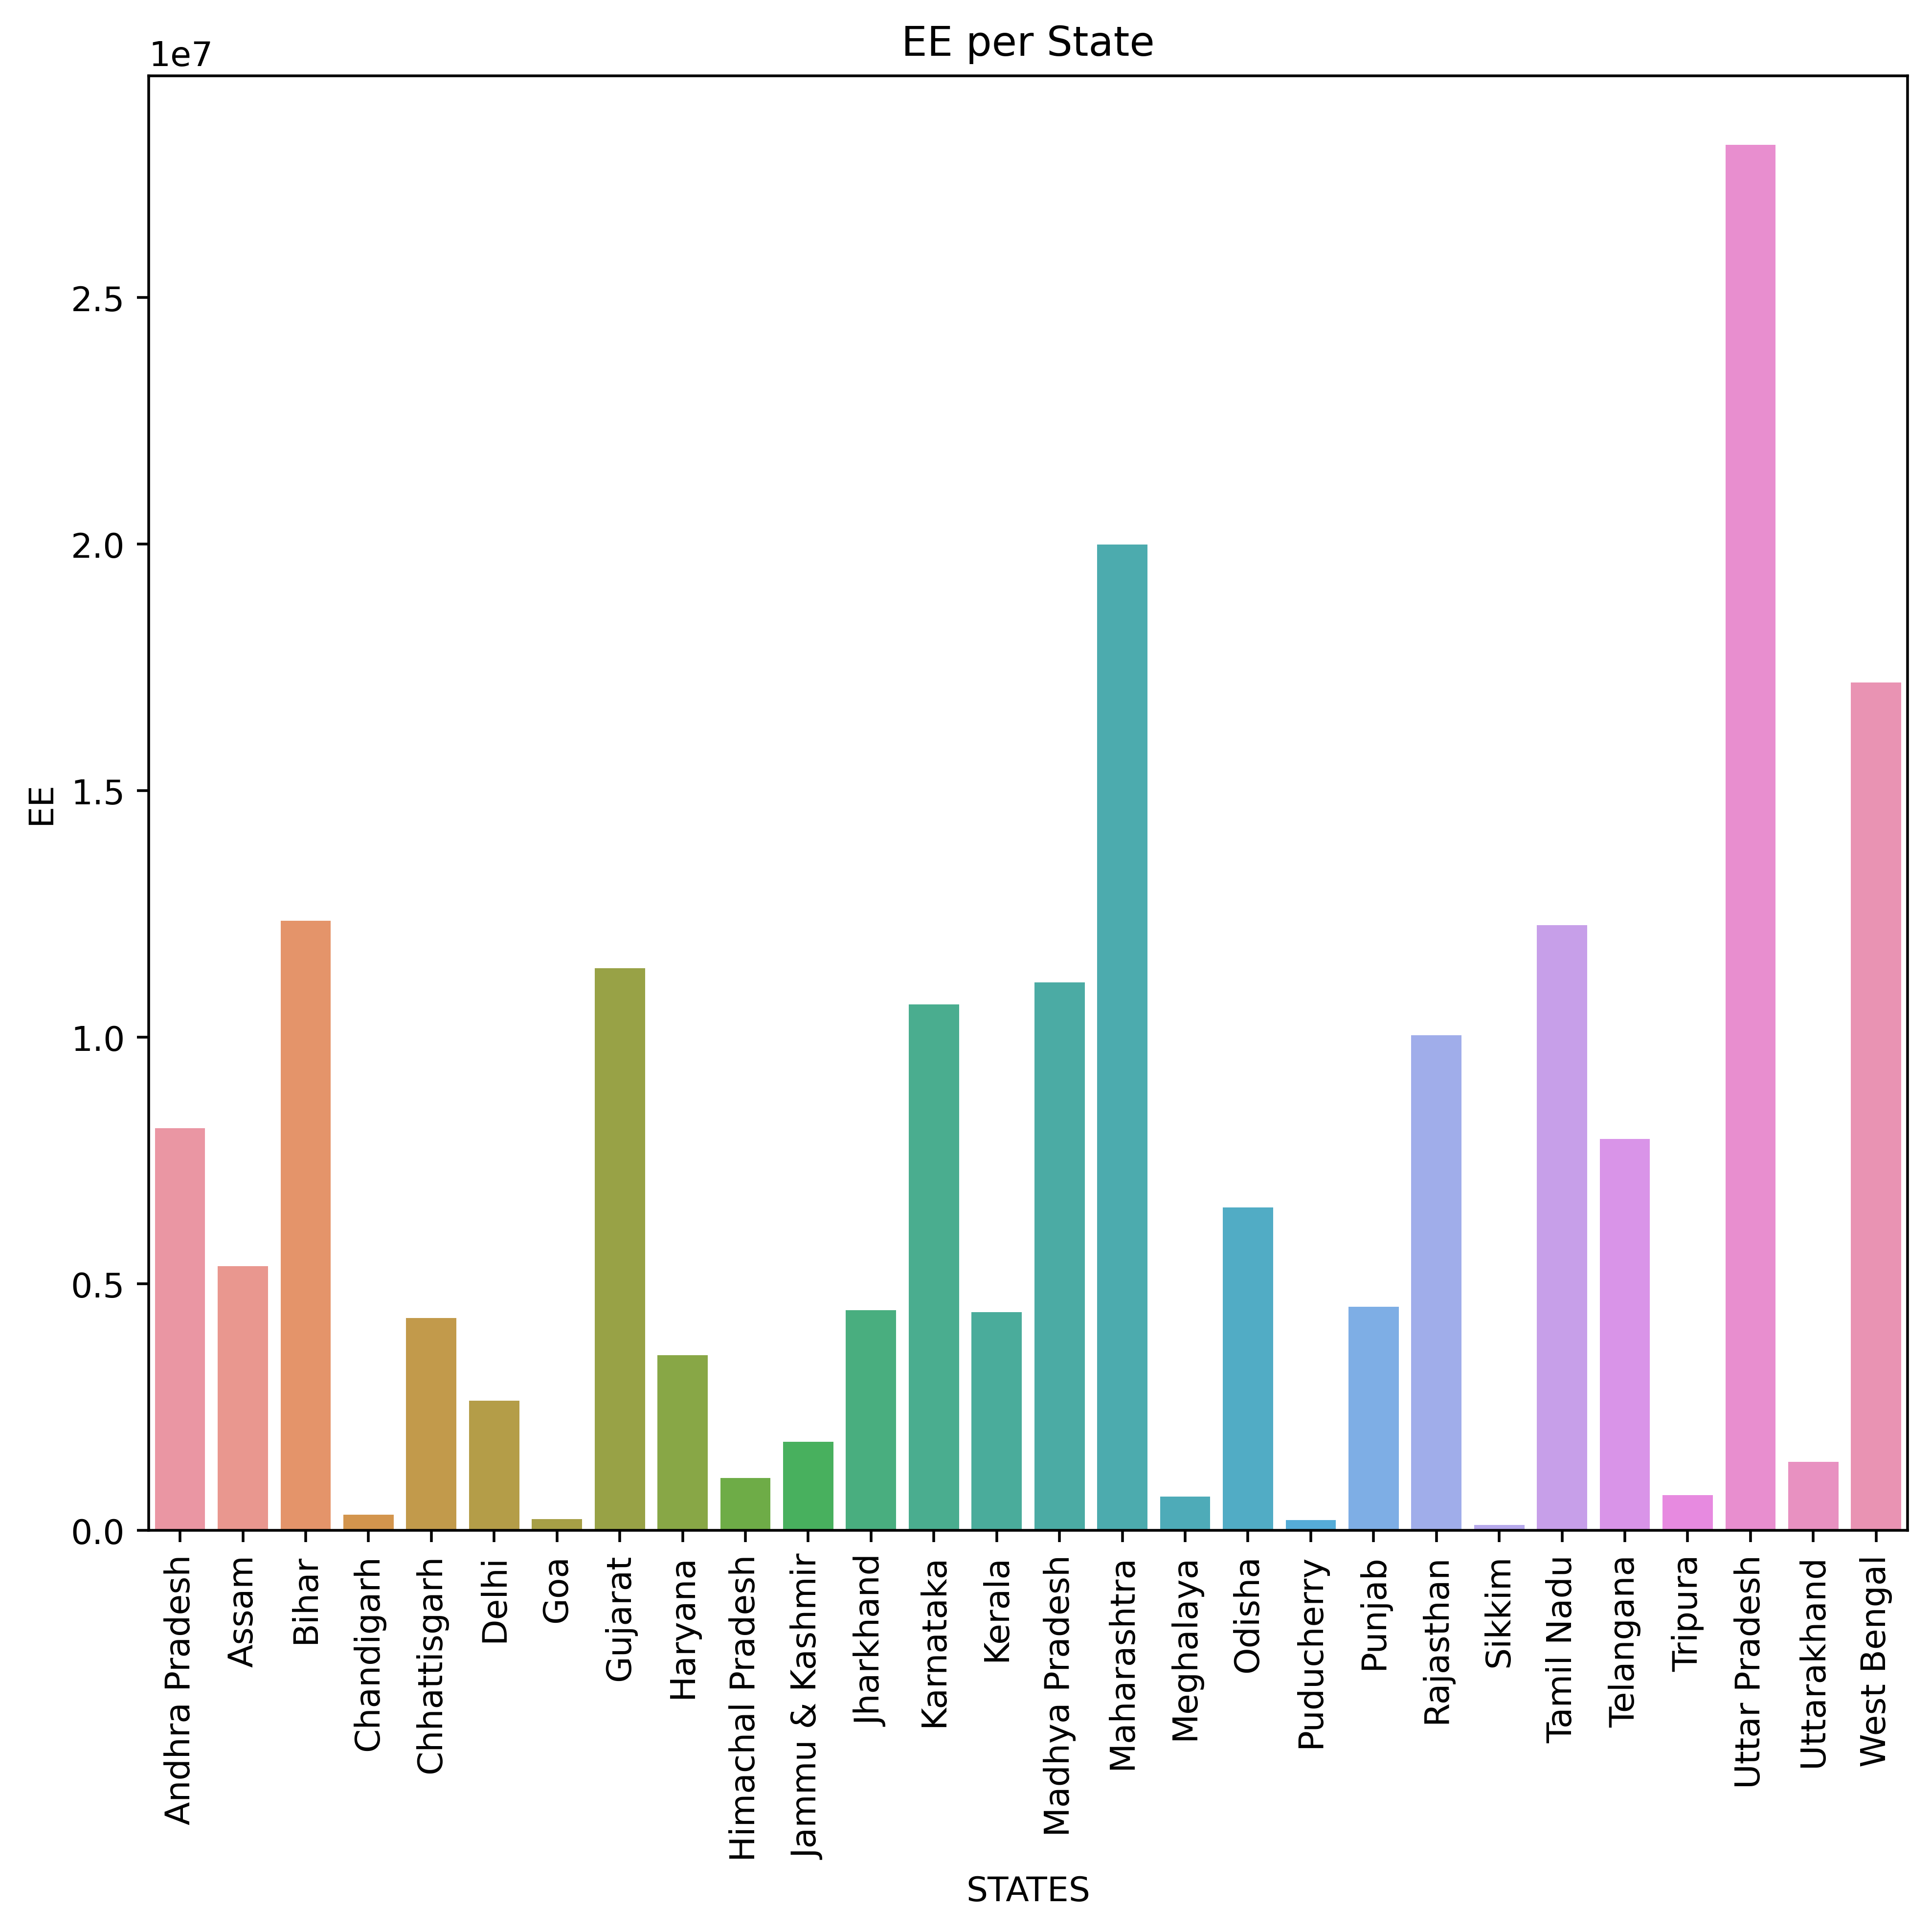

In [42]:
plt.figure(figsize=(8,8),dpi=500)

sns.barplot(data=region_stats, x='State', y='EE')
plt.xlabel('STATES')
plt.ylabel('EE')
plt.title('EE per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#UP HAS MOST EMPOLYED ESTIMATED
#SIKKIM HAS LEAST EMPLOYED ESTIMATED

In [ ]:
#CONCLUSION-TRIPURA HAS WORST UNEMPLOYED HAVING MORE EMPLOYED ESTIMATED 
#THAN MOST OF THE OTHER STATE STILL UNPLOYMENT RATE IS HIGHEST AMONG THE STATES